## Import packages

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
df = pd.read_csv('../data/us-counties.csv')

In [8]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 6 columns):
date      23967 non-null object
county    23967 non-null object
state     23967 non-null object
fips      23601 non-null float64
cases     23967 non-null int64
deaths    23967 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [10]:
df['county'].value_counts()

Washington         332
Unknown            323
Jefferson          251
Franklin           211
Montgomery         204
                  ... 
Oconto               1
Jim Wells            1
Barren               1
Kingsbury            1
Waynesboro city      1
Name: county, Length: 1367, dtype: int64

In [11]:
df.isnull().sum()

date        0
county      0
state       0
fips      366
cases       0
deaths      0
dtype: int64

In [13]:
df = df.drop(columns='fips')

In [14]:
df.isnull().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [15]:
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0
...,...,...,...,...,...
23962,2020-03-31,Sheridan,Wyoming,10,0
23963,2020-03-31,Sublette,Wyoming,1,0
23964,2020-03-31,Sweetwater,Wyoming,2,0
23965,2020-03-31,Teton,Wyoming,23,0


In [48]:
df['state'].value_counts()

Georgia                     1353
Texas                       1209
California                  1148
Florida                      850
New York                     849
Virginia                     832
Indiana                      816
Mississippi                  801
North Carolina               796
Tennessee                    763
Ohio                         748
Washington                   683
Louisiana                    682
Michigan                     681
Pennsylvania                 674
Colorado                     643
Illinois                     613
Kentucky                     572
Wisconsin                    560
Minnesota                    553
Alabama                      545
Arkansas                     541
Missouri                     537
South Carolina               533
Iowa                         503
New Jersey                   411
Oklahoma                     410
Oregon                       388
Kansas                       355
Maryland                     333
Massachuse

In [54]:
cs = df.groupby(['county', 'state'])

In [107]:
df_la = df.loc[df['county'] == 'Los Angeles']

In [108]:
df_la

,date,county,state,cases,deaths
9,2020-01-26,Los Angeles,California,1,0
14,2020-01-27,Los Angeles,California,1,0
19,2020-01-28,Los Angeles,California,1,0
24,2020-01-29,Los Angeles,California,1,0
29,2020-01-30,Los Angeles,California,1,0
...,...,...,...,...,...
14176,2020-03-27,Los Angeles,California,1465,27
15969,2020-03-28,Los Angeles,California,1804,33
17870,2020-03-29,Los Angeles,California,2136,37
19861,2020-03-30,Los Angeles,California,2474,44


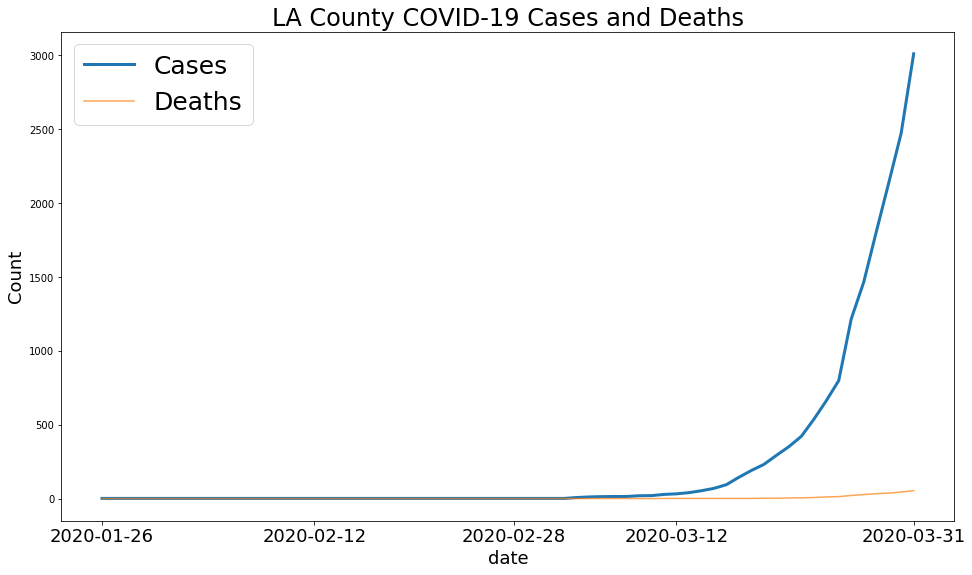

In [112]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.plot(df_la['date'], # X variable
         df_la['cases'], # Y variable
         label = 'Cases',
         lw = 3)

plt.plot(df_la['date'], # X variable
         df_la['deaths'], # Y variable
         label = 'Deaths',
         alpha = 0.7)

plt.title('LA County COVID-19 Cases and Deaths', fontsize = 24)
plt.xlabel('date', fontsize = 18)
plt.xticks(['2020-01-26', '2020-02-12', 
            '2020-02-28', '2020-03-12', '2020-03-31'], fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(fontsize = 25);




In [113]:
ny = df.groupby(['state'])

In [114]:
df_ny = df.loc[df['state'] == 'New York']

In [115]:
df_ny

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0
448,2020-03-02,New York City,New York,1,0
482,2020-03-03,New York City,New York,2,0
518,2020-03-04,New York City,New York,2,0
519,2020-03-04,Westchester,New York,9,0
...,...,...,...,...,...
23117,2020-03-31,Warren,New York,18,0
23118,2020-03-31,Washington,New York,10,0
23119,2020-03-31,Wayne,New York,19,0
23120,2020-03-31,Westchester,New York,9967,25


In [146]:
ny_cd = df_ny.groupby('date')[['cases', 'deaths']].sum()

In [147]:
ny_cd

,cases,deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,11,0
2020-03-05,22,0
2020-03-06,44,0
2020-03-07,89,0
2020-03-08,106,0
2020-03-09,142,0


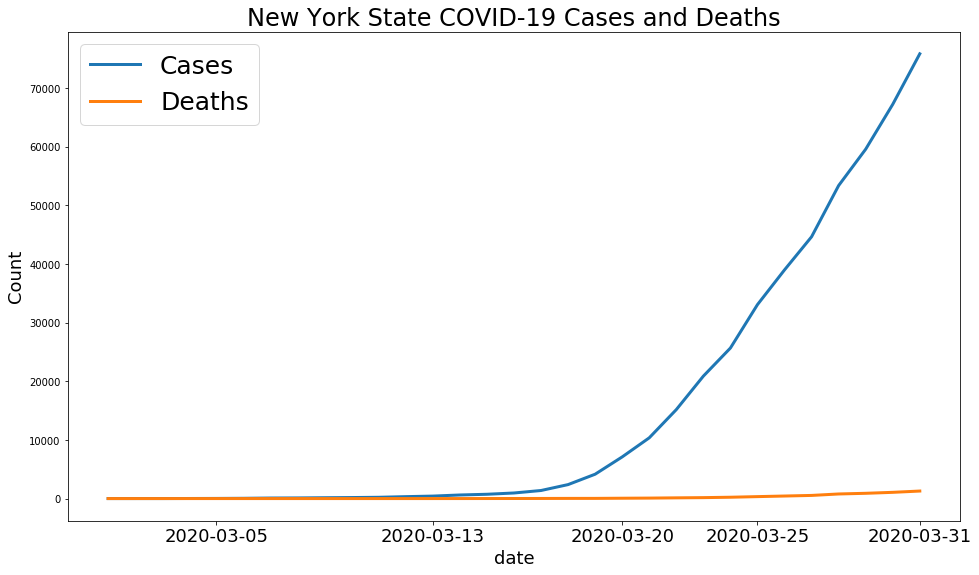

In [151]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.plot(ny_cd.index, # X variable
         ny_cd['cases'], # Y variable
         label = 'Cases',
         lw = 3)

plt.plot(ny_cd.index, # X variable
         ny_cd['deaths'], # Y variable
         label = 'Deaths',
         lw = 3)

plt.title('New York State COVID-19 Cases and Deaths', fontsize = 24)
plt.xlabel('date', fontsize = 18)
plt.xticks(['2020-03-05', '2020-03-13', '2020-03-20', '2020-03-25', '2020-03-31'], fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(fontsize = 25);



